<a href="https://colab.research.google.com/github/nadj4/masinsko-ucenje-radovi/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("diabetes_risk_prediction_dataset.csv")

data=data.replace('No', 0)
data=data.replace('Yes', 1)

data=data.replace('Male', 0)
data=data.replace('Female', 1)

data=data.replace('Negative', 0)
data=data.replace('Positive', 1)

data=data.drop(['Itching', 'delayed healing', 'Obesity', 'Age', 'weakness', 'Polyphagia', 'Genital thrush',
                'visual blurring', 'Irritability', 'muscle stiffness', 'Alopecia'], axis='columns')

cor= data.corr().iloc[-1].sort_values(ascending=True)
display(cor)

partial paresis       0.432288
sudden weight loss    0.436568
Gender                0.449233
Polydipsia            0.648734
Polyuria              0.665922
class                 1.000000
Name: class, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('class', axis = 1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8653846153846154


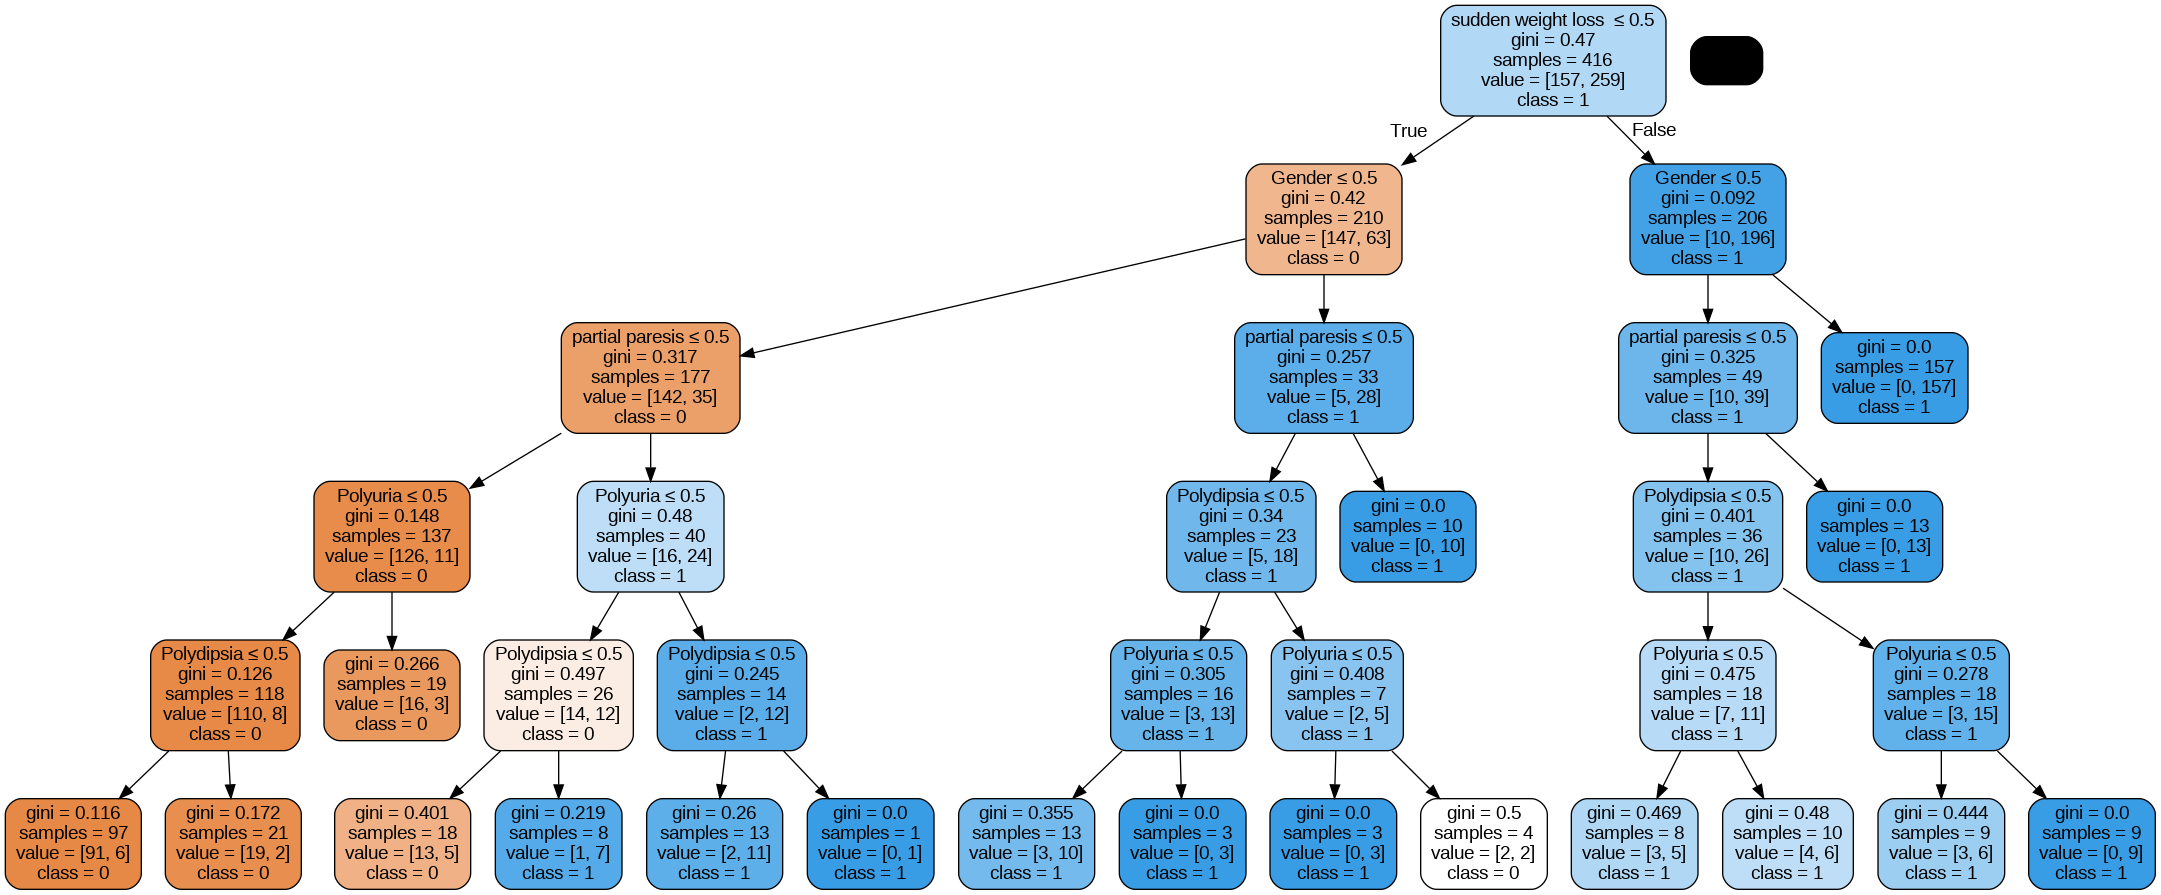

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['partial paresis', 'sudden weight loss ', 'Gender', 'Polydipsia','Polyuria']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())